<a href="https://colab.research.google.com/github/IMHOSUNG/Keras_Study/blob/master/KerasExample4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컬러 이미지에 대한 분류 CNN 코드

## 데이터 시각화 처리 

+ 데이터 학습 후 그래프 시각화 하는 처리에 대해서는 다음 링크에 있는 소스코드를 활용하였습니다.
  + [Link] (https://github.com/jskDr/keraspp/blob/master/keraspp/skeras.py)
  

In [0]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib


#출처 https://github.com/jskDr/keraspp/blob/master/keraspp/skeras.py
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

    
def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()
    
    
def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()            
    

## Cifar-10 데이터 사용을 위한 소스 코드

+ 케라스에 내장 된 함수를 통해 dataset을 호출 합니다. 

+ Cifar-10 데이터 셋은 10개의 카테고리를 가지고 있으며, 50000개의 학습 셋과 10000개의 검증 셋을 가지고 있습니다.

+ L, W, H, C 를 프린트 하면 학습 하는 셋에 대한 정보를 알 수 있습니다.

In [0]:
# 
def Data_func() :
  (X_train , y_train) , (X_test, y_test) = datasets.cifar10.load_data()
  
  # y_train은 X_train의 값에 대해서 분류 된 값 1개가 나온다 따라서 Y_train의 범위는 데이터 셋의 결과 값 집합 10개의 숫자에 맞게 설정
  # 이 때 np_utils를 사용한다.
  Y_train = np_utils.to_categorical(y_train)
  Y_test = np_utils.to_categorical(y_test)
  
  # L (데이터 수) , W (이미지 넓이 Y축) , H (이미지 높이 X축), C (이미지 채널 수)
  L, W, H, C = X_train.shape
  

  X_train = X_train / 255.0
  X_test = X_test / 255.0
  
  return (X_train , Y_train) , (X_test , Y_test)


### 학습을 위한 모델 구성

+ 학습을 위해 CNN모델을 사용하였습니다. 

+ 주석으로 각 계층을 통과 할 때, 변화를 적어 놓았습니다.

+ 기본 데이터 셋의 구성이 32*32*3의 크기를 가지고 있기 때문에, MaxPooling 횟수의 한계가 존재 합니다.


In [0]:
from keras import layers, models

class CNN(models.Sequential) :
  def __init__(self, Nin, Nh_l, Pd_I, Nout) :
    super().__init__()
    
    #32 * 32 * 3
    
    self.add(layers.Conv2D(Nh_l[0], (3,3) ,padding='same' , activation='relu', input_shape = (Nin[1],Nin[2],Nin[3]) , name='Hidden-1'))
    self.add(layers.MaxPooling2D((2,2)))
    
    #16 * 16 * 32
    self.add(layers.Conv2D(Nh_l[1], (3,3), padding='same' , activation='relu', name = 'Hidden-2'))
    self.add(layers.MaxPooling2D((2,2)))
    
    #8 * 8 * 64
    self.add(layers.Conv2D(Nh_l[2], (3,3) , padding='same' , activation='relu', name = 'Hidden-3'))
    
    #8 * 8 * 128
    self.add(layers.Conv2D(Nh_l[3], (3,3), padding='same' , activation='relu', name = 'Hidden-4'))
    
    #8 * 8 * 128
    self.add(layers.Conv2D(Nh_l[4], (3,3), padding='same' , activation='relu', name = 'Hidden-5'))
    
    #8 * 8 * 256
    self.add(layers.Flatten())
    self.add(layers.Dropout(Pd_I[0]))
    self.add(layers.Dense(512, activation='relu' ))
    self.add(layers.Dense(128, activation = 'relu'))
    self.add(layers.Dense(64, activation = 'relu'))
    self.add(layers.Dense(Nout, activation='softmax'))
    self.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
    print(self.summary())

## 결과 분석을 위한 라벨 설정 및 결과 화면 생성

+ 데이터 셋의 10가지 라벨은 다음과 같이 존재하며, 처음 16개의 데이터를 학습된 모델로 예측 할 때 적절한 예측을 하는 지 확인 해보기 위한 소스 입니다.

In [0]:
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  



## 데이터셋 증폭 소스

+ 일반적인 5만개의 데이터 셋으로 학습을 할 경우, 적은 데이터 셋을 사용하기 때문에 오버피팅 문제가 발생합니다. 

+ 따라서 일반적인 경우에도 사용할 수 있게, 기존 데이터 셋을 이동, 반전, 회전 등을 통해 증폭 시켜서 학습 데이터 셋을 증가 시키며 이러한 방법을 통해 
오버 피팅 문제를 해결 할 수 있습니다.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

def ImagePumping() :
  print("ImagePumping is active#############################")
  return ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0   
  )
  
  

## 학습 시작

+ 학습을 진행 합니다. 

+ 2개의 history 중 위의 것으로 할 경우 오버 피팅이 발생하는 경우를 확인 할 수 있습니다. (데이터 증폭 x)

+ 아래의 경우로 할 경우 데이터를 증폭 시킨 후 학습을 진행 합니다. 

+ 콘솔로 남은 경우는 아래의 history에 대한 분석을 진행하였을 때 결과 값입니다.

+ 마지막의 결과를 확인할 경우 16개의 경우 중 15개의 경우가 타당하게 분류 하는 것을 알 수 있으며

+ 정확도는 84% 가 나오는 것을 확인 할 수 있습니다.

In [0]:
import matplotlib.pyplot as plt

def main() :
  #히든 레이어 채널 갯수 및 Dense 파라미터
  Nh_I = [32, 64, 128, 128, 256]
  #드랍 아웃 파라미터
  Pd_I = [0.5]
  number_of_class = 10
  Nout = number_of_class
  
  (X_train, Y_train) , (X_test, Y_test) = Data_func()
  model = CNN(X_train.shape, Nh_I, Pd_I , Nout)
  datagen = ImagePumping()

  #history = model.fit(X_train, Y_train, epochs = 100 , batch_size = 100, validation_split = 0.2)
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 100),steps_per_epoch=X_train.shape[0]//100,
                               epochs = 100,
                               validation_data = (X_test, Y_test), workers = 4)
  model.save_weights('./saveWeight.h5', overwrite = True)
  performace_test = model.evaluate(X_test, Y_test, batch_size = 100)
  print("Test Loss And Accuracy ->" , performace_test)
  
  plot_acc(history)
  plt.show()
  plot_loss(history)
  plt.show()
  
  print("Show Case ")
  plot_predictions(np.squeeze(X_test[:16]), model.predict(X_test[:16]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
Hidden-2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
Hidden-3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
Hidden-4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
Hidden-5 (Conv2D)            (None, 8, 8, 256)         295168    
__________

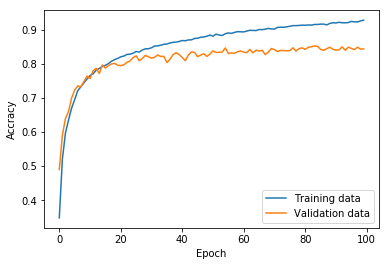

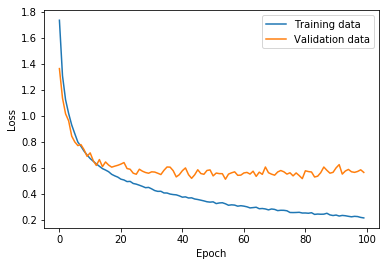

Show Case 


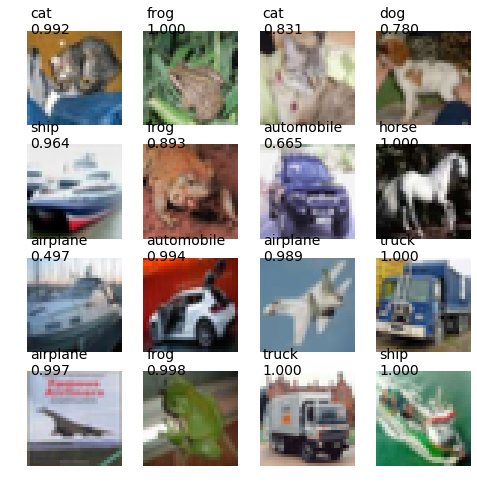

In [24]:
if __name__ == '__main__' :
  main()

## 저장된 weight를 사용하여 학습 결과 보기

+ saveWeight.h5를 불러와 분류 하는 방법 입니다.